## Obesity Trends 

### Importing Standard Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data 

In [2]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [3]:
df.shape

(53392, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
YearStart                     53392 non-null int64
YearEnd                       53392 non-null int64
LocationAbbr                  53392 non-null object
LocationDesc                  53392 non-null object
Datasource                    53392 non-null object
Class                         53392 non-null object
Topic                         53392 non-null object
Question                      53392 non-null object
Data_Value_Unit               0 non-null float64
Data_Value_Type               53392 non-null object
Data_Value                    48346 non-null float64
Data_Value_Alt                48346 non-null float64
Data_Value_Footnote_Symbol    5046 non-null object
Data_Value_Footnote           5046 non-null object
Low_Confidence_Limit          48346 non-null float64
High_Confidence_Limit         48346 non-null float64
Sample_Size                   48346 non-null float64
Total    

### Data Exploration and Preprocessing

#### removing unnecessary data columns

In [5]:
df  = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit',
               'QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol',
               'Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1)
df.head()

,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.0,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Total,Total
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.3,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.6,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Less than high school
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.8,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,High school graduate


In [6]:
print(df['Question'].unique(),)

['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who report consuming fruit less than one time daily'
 'Percent of adults who report consuming vegetables less than one time daily'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic act

In [7]:
# we need columns where only question is people who have obesity so 
df = df[df['Question']=='Percent of adults aged 18 years and older who have obesity']
print(df['Question'].unique(),)

['Percent of adults aged 18 years and older who have obesity']


#### Plotting Obesity % plots

Text(0.5, 1.0, 'YearWise Obesity %')

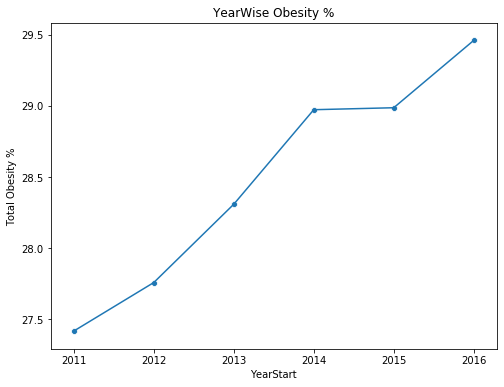

In [8]:
df['Data_Value_Alt'] = df['Data_Value']*df['Sample_Size']/100
temp_df = df[df['Total']=='Total']
temp_df = temp_df.groupby('YearStart').sum()
temp_df['Total Obesity %'] = temp_df['Data_Value_Alt']/temp_df['Sample_Size']*100
temp_df.reset_index(inplace = True)
plt.figure(figsize = (8,6))
plt.plot(temp_df['YearStart'],temp_df['Total Obesity %'])
sns.scatterplot(x = 'YearStart', y = 'Total Obesity %', data = temp_df)
plt.title('YearWise Obesity %')
# temp_df.head()

In [9]:
# Top 10 obesity states in 2016
temp_df = df[df['YearStart']==2016]
temp_df.head()
temp_df.dropna(subset = ['Data_Value',],inplace = True)

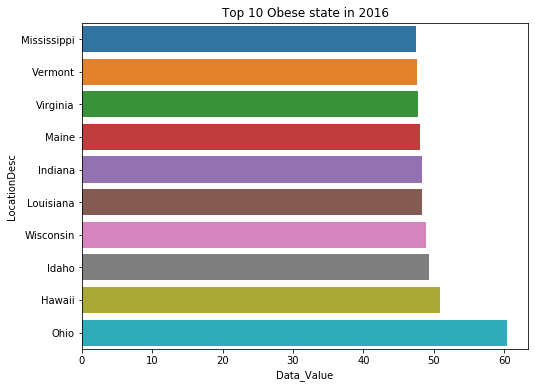

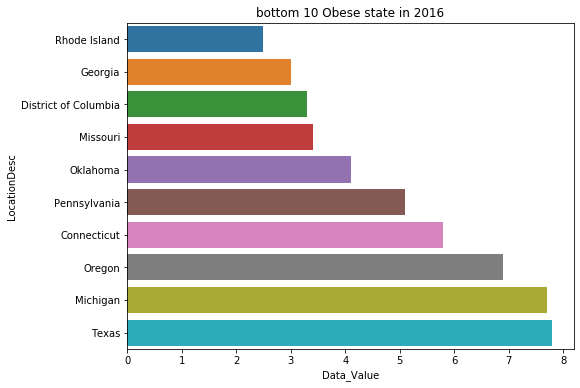

In [10]:
temp_df = temp_df.sort_values('Data_Value')
plt.figure(figsize = (8,6))
plt.title('Top 10 Obese state in 2016')
sns.barplot(x = 'Data_Value',y= 'LocationDesc',data = temp_df.tail(10))
plt.figure(figsize = (8,6))
plt.title('bottom 10 Obese state in 2016')
sns.barplot(x = 'Data_Value',y= 'LocationDesc',data = temp_df.head(10))

#####  Further Removing unnecessary columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8960 entries, 0 to 51851
Data columns (total 17 columns):
YearStart                  8960 non-null int64
LocationAbbr               8960 non-null object
LocationDesc               8960 non-null object
Question                   8960 non-null object
Data_Value                 8127 non-null float64
Data_Value_Alt             8127 non-null float64
Sample_Size                8127 non-null float64
Total                      320 non-null object
Age(years)                 1920 non-null object
Education                  1280 non-null object
Gender                     640 non-null object
Income                     2240 non-null object
Race/Ethnicity             2560 non-null object
GeoLocation                8792 non-null object
LocationID                 8960 non-null int64
StratificationCategory1    8960 non-null object
Stratification1            8960 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.2+ MB


In [12]:
print(len(df))

8960


In [13]:
print(df['YearStart'].nunique())
print(df['LocationID'].nunique())
print(df['Stratification1'].nunique())
6*55*28

6
55
28


9240

#### 8960 =~ 9240 i.e (total years * total_stratification per year * total Location) Is equal to our length of dataset

In [14]:
df = df.drop(['LocationDesc','Data_Value_Alt','LocationAbbr','Stratification1','GeoLocation','Question'],1)
df.head()

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID,StratificationCategory1
0,2011,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,1,Total
1,2011,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,1,Gender
2,2011,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,1,Gender
3,2011,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,1,Education
4,2011,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,1,Education


In [15]:
df.describe()

,YearStart,Data_Value,Sample_Size,LocationID
count,8960.000000,8127.000000,8127.000000,8960.000000
mean,2013.534375,28.929384,3896.286206,30.562500
std,1.708184,6.929260,19887.514732,17.115162
min,2011.000000,0.900000,50.000000,1.000000
25%,2012.000000,25.400000,567.000000,17.000000
50%,2014.000000,29.400000,1199.000000,30.000000
75%,2015.000000,33.250000,2529.500000,44.250000
max,2016.000000,60.400000,470700.000000,78.000000


In [16]:
df.isnull().sum()*100/len(df)

YearStart                   0.000000
Data_Value                  9.296875
Sample_Size                 9.296875
Total                      96.428571
Age(years)                 78.571429
Education                  85.714286
Gender                     92.857143
Income                     75.000000
Race/Ethnicity             71.428571
LocationID                  0.000000
StratificationCategory1     0.000000
dtype: float64

In [17]:
len(df)

8960

In [18]:
df.isnull().any()

YearStart                  False
Data_Value                  True
Sample_Size                 True
Total                       True
Age(years)                  True
Education                   True
Gender                      True
Income                      True
Race/Ethnicity              True
LocationID                 False
StratificationCategory1    False
dtype: bool

In [19]:
df.head()

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID,StratificationCategory1
0,2011,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,1,Total
1,2011,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,1,Gender
2,2011,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,1,Gender
3,2011,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,1,Education
4,2011,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,1,Education


In [20]:
temp_df = df[(df['Total']=='Total') & (df['LocationID']==25)]

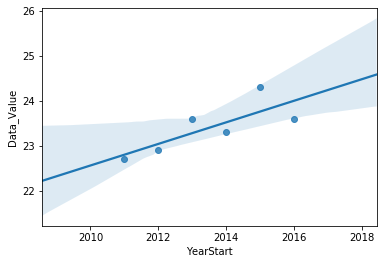

In [21]:
sns.regplot(x= 'YearStart',y='Data_Value',data = temp_df)

##### By Carefull observation of data We can conclude that data samples is too low to build any model Because there is only data of  6 samples  years from 2011 to 2016 per each state.   Further the model will be like predicting 7 th value based on first 6 values so accuracy will be low   fitting KNeighborRegressor will be better than fitting Linear Regression

In [22]:
df = df.dropna(subset = ['Data_Value'],)
df.isnull().sum()*100/len(df)

YearStart                   0.000000
Data_Value                  0.000000
Sample_Size                 0.000000
Total                      96.062508
Age(years)                 76.375046
Education                  84.250031
Gender                     92.125015
Income                     72.437554
Race/Ethnicity             78.749846
LocationID                  0.000000
StratificationCategory1     0.000000
dtype: float64

In [23]:
df = df.fillna(0)
df.head()

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID,StratificationCategory1
0,2011,32.0,7304.0,Total,0,0,0,0,0,1,Total
1,2011,32.3,2581.0,0,0,0,Male,0,0,1,Gender
2,2011,31.8,4723.0,0,0,0,Female,0,0,1,Gender
3,2011,33.6,1153.0,0,0,Less than high school,0,0,0,1,Education
4,2011,32.8,2402.0,0,0,High school graduate,0,0,0,1,Education


In [24]:
df = df.drop('StratificationCategory1',1)

In [25]:
df.isnull().any()

YearStart         False
Data_Value        False
Sample_Size       False
Total             False
Age(years)        False
Education         False
Gender            False
Income            False
Race/Ethnicity    False
LocationID        False
dtype: bool

### Encoding

#####  As discussed above data columns  Total, Age(years), Education, Gender, Income, Race/Ethinicity are mutually exclusive data columns so all columns are a type of one hot encoding and individually  lets code using Label Encoder or Ordinal Encoder

In [26]:
inmap = {0:0,'Total':1}
df['Total'] = df['Total'].map(inmap)
df.head()

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
0,2011,32.0,7304.0,1,0,0,0,0,0,1
1,2011,32.3,2581.0,0,0,0,Male,0,0,1
2,2011,31.8,4723.0,0,0,0,Female,0,0,1
3,2011,33.6,1153.0,0,0,Less than high school,0,0,0,1
4,2011,32.8,2402.0,0,0,High school graduate,0,0,0,1


In [27]:
temp1 = list(df['Age(years)'].unique())
temp2 = list(range(7))
inmap = {k:v for k,v in zip(temp1,temp2)}
df['Age(years)'] = df['Age(years)'].map(inmap)
df.head(20)

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
0,2011,32.0,7304.0,1,0,0,0,0,0,1
1,2011,32.3,2581.0,0,0,0,Male,0,0,1
2,2011,31.8,4723.0,0,0,0,Female,0,0,1
3,2011,33.6,1153.0,0,0,Less than high school,0,0,0,1
4,2011,32.8,2402.0,0,0,High school graduate,0,0,0,1
5,2011,33.8,1925.0,0,0,Some college or technical school,0,0,0,1
6,2011,26.4,1812.0,0,0,College graduate,0,0,0,1
7,2011,16.3,356.0,0,1,0,0,0,0,1
8,2011,35.2,598.0,0,2,0,0,0,0,1
9,2011,35.5,865.0,0,3,0,0,0,0,1


In [28]:
temp1 = list(df['Education'].unique())
temp2 = list(range(len(temp1)))
inmap = {k:v for k,v in zip(temp1,temp2)}
df['Education'] = df['Education'].map(inmap)
df.head(10)

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
0,2011,32.0,7304.0,1,0,0,0,0,0,1
1,2011,32.3,2581.0,0,0,0,Male,0,0,1
2,2011,31.8,4723.0,0,0,0,Female,0,0,1
3,2011,33.6,1153.0,0,0,1,0,0,0,1
4,2011,32.8,2402.0,0,0,2,0,0,0,1
5,2011,33.8,1925.0,0,0,3,0,0,0,1
6,2011,26.4,1812.0,0,0,4,0,0,0,1
7,2011,16.3,356.0,0,1,0,0,0,0,1
8,2011,35.2,598.0,0,2,0,0,0,0,1
9,2011,35.5,865.0,0,3,0,0,0,0,1


In [29]:
temp1 = list(df['Income'].unique())
temp2 = list(range(len(temp1)))
inmap = {k:v for k,v in zip(temp1,temp2)}
df['Income'] = df['Income'].map(inmap)
df.head(20)

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
0,2011,32.0,7304.0,1,0,0,0,0,0,1
1,2011,32.3,2581.0,0,0,0,Male,0,0,1
2,2011,31.8,4723.0,0,0,0,Female,0,0,1
3,2011,33.6,1153.0,0,0,1,0,0,0,1
4,2011,32.8,2402.0,0,0,2,0,0,0,1
5,2011,33.8,1925.0,0,0,3,0,0,0,1
6,2011,26.4,1812.0,0,0,4,0,0,0,1
7,2011,16.3,356.0,0,1,0,0,0,0,1
8,2011,35.2,598.0,0,2,0,0,0,0,1
9,2011,35.5,865.0,0,3,0,0,0,0,1


In [30]:
temp1 = list(df['Race/Ethnicity'].unique())
temp2 = list(range(len(temp1)))
inmap = {k:v for k,v in zip(temp1,temp2)}
df['Race/Ethnicity'] = df['Race/Ethnicity'].map(inmap)
df.tail(10)

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
51837,2016,25.2,199.0,0,0,0,0,1,0,78
51838,2016,34.0,231.0,0,0,0,0,2,0,78
51839,2016,30.6,150.0,0,0,0,0,3,0,78
51840,2016,36.3,153.0,0,0,0,0,4,0,78
51841,2016,43.3,158.0,0,0,0,0,5,0,78
51842,2016,32.6,206.0,0,0,0,0,6,0,78
51843,2016,31.8,106.0,0,0,0,0,7,0,78
51844,2016,21.3,148.0,0,0,0,0,0,1,78
51845,2016,34.3,783.0,0,0,0,0,0,2,78
51846,2016,32.7,170.0,0,0,0,0,0,3,78


In [31]:
list(df['Race/Ethnicity'].unique())


[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
inmap = {0:0,'Male':1,'Female':2}
df['Gender'] = df['Gender'].map(inmap)
df.head()

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
0,2011,32.0,7304.0,1,0,0,0,0,0,1
1,2011,32.3,2581.0,0,0,0,1,0,0,1
2,2011,31.8,4723.0,0,0,0,2,0,0,1
3,2011,33.6,1153.0,0,0,1,0,0,0,1
4,2011,32.8,2402.0,0,0,2,0,0,0,1


#### Standard Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
df[['Sample_Size']] = ss.fit_transform(df[['Sample_Size']])
df.head()

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
0,2011,32.0,0.171360,1,0,0,0,0,0,1
1,2011,32.3,-0.066140,0,0,0,1,0,0,1
2,2011,31.8,0.041572,0,0,0,2,0,0,1
3,2011,33.6,-0.137949,0,0,1,0,0,0,1
4,2011,32.8,-0.075142,0,0,2,0,0,0,1


### X and y

In [35]:
X = df.drop('Data_Value',1)
y = df['Data_Value']
print('X.shape: ',X.shape)
print('y.shape: ',y.shape)

X.shape:  (8127, 9)
y.shape:  (8127,)


### Train_Test_Split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state =101)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6095, 9)
(2032, 9)
(6095,)
(2032,)


### Fitting LinearRegression Model 

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lr.score(X_train,y_train)

0.07413095886218668

### Prediction & Evaluations

In [41]:
y_pred = lr.predict(X_test)

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_pred,y_test)

-11.38100293125725

##### The model is very far from predicting the results it is highly bias(training data accuracy) and very high variance(test data  accuracy)

### Fitting KNNRegressor Model

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [45]:
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [46]:
knr.score(X_train,y_train)

0.700599434448475

In [47]:
y_pred = knr.predict(X_test)

In [48]:
r2_score(y_pred,y_test)

0.06686492418148438

####  Optimal K value

In [49]:
k = np.arange(1,51)
r2_score_list = []
for i in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    r2_score_list.append(r2_score(y_pred,y_test))

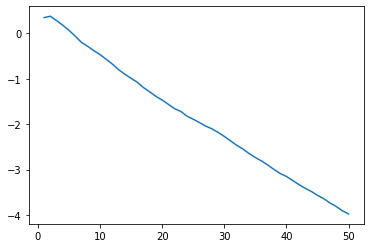

In [50]:
plt.plot(k,r2_score_list)

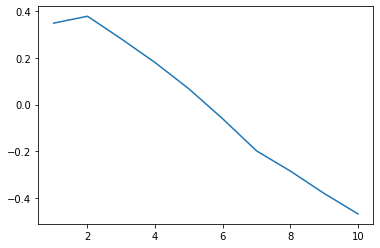

In [51]:
plt.plot(k[:10],r2_score_list[:10])

when k = 2 we get around 40% accuracy for our model

In [52]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)
print('Training data accuracy :-')
print(knn.score(X_train,y_train))
y_pred = knn.predict(X_test)
print('\nresults r2_score :- ')
print(r2_score(y_pred,y_test))

Training data accuracy :-
0.843245208263645

results r2_score :- 
0.37735937175436285


##### This model is comparetively good than  LinearRegression model